## Análisis de la situación de la pandemia de COVID19 en Europa

In [2]:
# IMPORTAMOS LIBRERIAS
import pandas as pd
pd.set_option('display.max_row', 100)
pd.set_option('display.max_columns', 30)
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn')

In [3]:
#IMPORTAMOS LOS DATOS
datos=pd.read_excel("https://covid.ourworldindata.org/data/owid-covid-data.xlsx", "Sheet1",index_col=3,parse_dates=True)

In [27]:
# Exploración de los datos y selección
datos=datos.loc['2021-06':]
datos.columns
datos.shape
datos.query("continent=='Europe'").location.value_counts()

Finland                   117
Cyprus                    117
Greece                    117
Bulgaria                  117
Switzerland               117
Iceland                   117
Sweden                    117
Ukraine                   117
Latvia                    117
Slovakia                  117
Russia                    117
Austria                   117
Andorra                   117
Bosnia and Herzegovina    117
Monaco                    117
Slovenia                  117
Italy                     117
Albania                   117
Serbia                    117
United Kingdom            117
Germany                   117
Croatia                   117
Belarus                   117
Hungary                   117
Romania                   117
Ireland                   117
Portugal                  117
Kosovo                    117
Lithuania                 117
Poland                    117
Belgium                   117
Spain                     117
Malta                     117
Liechtenst

In [28]:
    #Preparamos los datos
df=datos.query("continent=='Europe' and population>5000000")
df.location.value_counts()
listcountries=df.location.unique()
df=df[['location','new_cases_smoothed_per_million']] # Manera sintética de seleccionar columnas
df=df.set_index([df.index,"location"]).unstack('location')

In [29]:
df

new_cases_smoothed_per_million                                     \
location                          Austria  Belarus  Belgium Bulgaria Czechia   
date                                                                           
2021-06-01                         47.613  109.788  157.467   34.799  39.988   
2021-06-02                         46.903  105.945  156.043   30.740  37.604   
2021-06-03                         42.116  100.847  140.176   28.192  35.006   
2021-06-04                         38.830   97.050  128.988   25.499  34.087   
2021-06-05                         35.244   95.007  124.174   24.960  32.342   
...                                   ...      ...      ...      ...     ...   
2021-09-21                        211.764  207.186  179.008  236.947  40.614   
2021-09-22                        202.254  208.184  173.433  215.985  41.174   
2021-09-23                        194.498  208.275  172.549  218.284  41.187   
2021-09-24                        184.861  208.502  170.817  218.532  40.255   
2021-09-25                        188.700  208.517  170.817  220.335  40.961   

                                                                        \
location    Denmark Finland   France  Germany   Greece Hungary   Italy   
date                                                                     
2021-06-01  171.061  23.121  144.362   51.660  145.740  32.652  53.037   
2021-06-02  168.112  20.753  120.463   52.721  143.921  33.571  50.578   
2021-06-03  165.925  21.911  123.901   47.168  134.733  32.370  45.419   
2021-06-04  164.254  20.444  114.775   41.760  123.410  29.716  42.625   
2021-06-05  153.269  23.533  104.472   37.905  115.627  27.269  40.462   
...             ...     ...      ...      ...      ...     ...     ...   
2021-09-21   57.184  72.402   98.873  102.477  223.720  39.576  67.861   
2021-09-22   56.496  71.244  113.128   98.782  222.604  41.504  65.818   
2021-09-23   57.405  70.909   98.165   96.226  219.560  42.512  63.305   
2021-09-24   59.027  71.141   95.879   94.575  216.832  43.283  61.521   
2021-09-25   59.863  61.073   90.377   93.417  211.736  43.283  59.019   

                                                                              \
location   Netherlands   Norway  Poland Portugal  Romania   Russia    Serbia   
date                                                                           
2021-06-01     170.582   63.069  21.472   51.956   13.623   61.394    41.422   
2021-06-02     168.411   59.253  19.189   53.783   12.017   61.840    39.322   
2021-06-03     163.595   56.117  16.781   56.550   11.188   61.738    37.055   
2021-06-04     151.375   55.176  14.423   54.190   10.471   61.438    34.535   
2021-06-05     141.068   53.163  13.051   53.684    9.829   61.297    31.827   
...                ...      ...     ...      ...      ...      ...       ...   
2021-09-21     115.754  128.622  17.208   84.299  240.929  132.581  1017.338   
2021-09-22     112.027  134.843  17.632   79.297  263.641  133.330  1008.373   
2021-09-23     109.673  128.021  18.577   76.810  283.462  135.029   984.818   
2021-09-24     105.822  126.505  19.181   73.073  303.164  136.353   961.514   
2021-09-25     102.527  125.172  19.639   69.898  320.252  137.904   949.904   

                                                                          
location   Slovakia   Spain   Sweden Switzerland  Ukraine United Kingdom  
date                                                                      
2021-06-01   23.022  91.374   57.620      88.070   62.718         48.499  
2021-06-02   21.295  91.303   19.207      83.497   58.820         51.166  
2021-06-03   20.536  91.181  119.796      76.875   55.763         54.929  
2021-06-04   20.484  89.613  134.826      69.974   52.349         59.357  
2021-06-05   23.545  89.613  134.826      69.974   48.408         64.413  
...             ...     ...      ...         ...      ...            ...  
2021-09-21  119.921  59.465   74.450     200.579  121.600

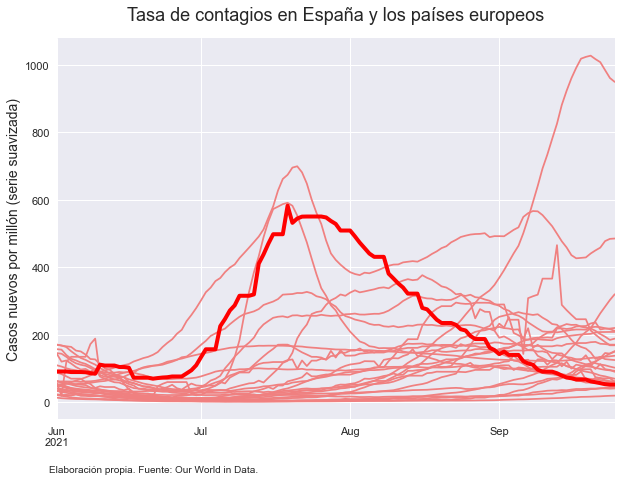

In [30]:
# Ejemplo de figura con un bucle
fig,ax=plt.subplots(figsize=(10,7))
for c in listcountries:
    df["new_cases_smoothed_per_million"][c].plot(color="lightcoral", ax=ax)
df["new_cases_smoothed_per_million"]["Spain"].plot(color="red", linewidth=4, ax=ax)
ax.set_xlabel("")
ax.tick_params(labelsize=11)
ax.set_ylabel("Casos nuevos por millón (serie suavizada)", size=14)
ax.set_title("Tasa de contagios en España y los países europeos", size=18, pad=18)
fig.text(0.26,0.02,"Elaboración propia. Fuente: Our World in Data.", ha="center",fontsize=10 ) # ha=horizontalalignment
plt.show()

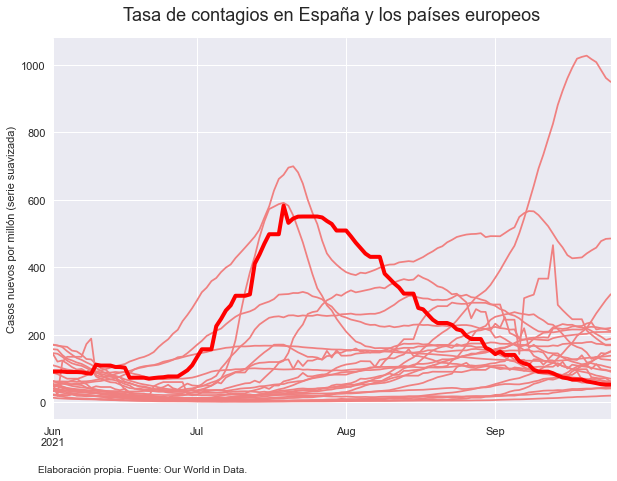

In [31]:
# También se podría hacer sin bucle
fig,ax=plt.subplots(figsize=(10,7))
df["new_cases_smoothed_per_million"].plot(color="lightcoral",  legend=False, ax=ax)
df["new_cases_smoothed_per_million"]["Spain"].plot(color="red", linewidth=4, ax=ax)
ax.set_xlabel("")
ax.tick_params(labelsize=11)
ax.set_ylabel("Casos nuevos por millón (serie suavizada)")
ax.set_title("Tasa de contagios en España y los países europeos", size=18, pad=18)
fig.text(0.25,0.02,"Elaboración propia. Fuente: Our World in Data.", ha="center",fontsize=10 ) # ha=horizontalalignment
plt.show()

In [32]:
# Este más informativo
df2=df[-7:].mean()
df2.sort_values(inplace=True, ascending=False)
df2=df2.reset_index()
newlist=df2.location.to_list()
df=df['new_cases_smoothed_per_million'][newlist]

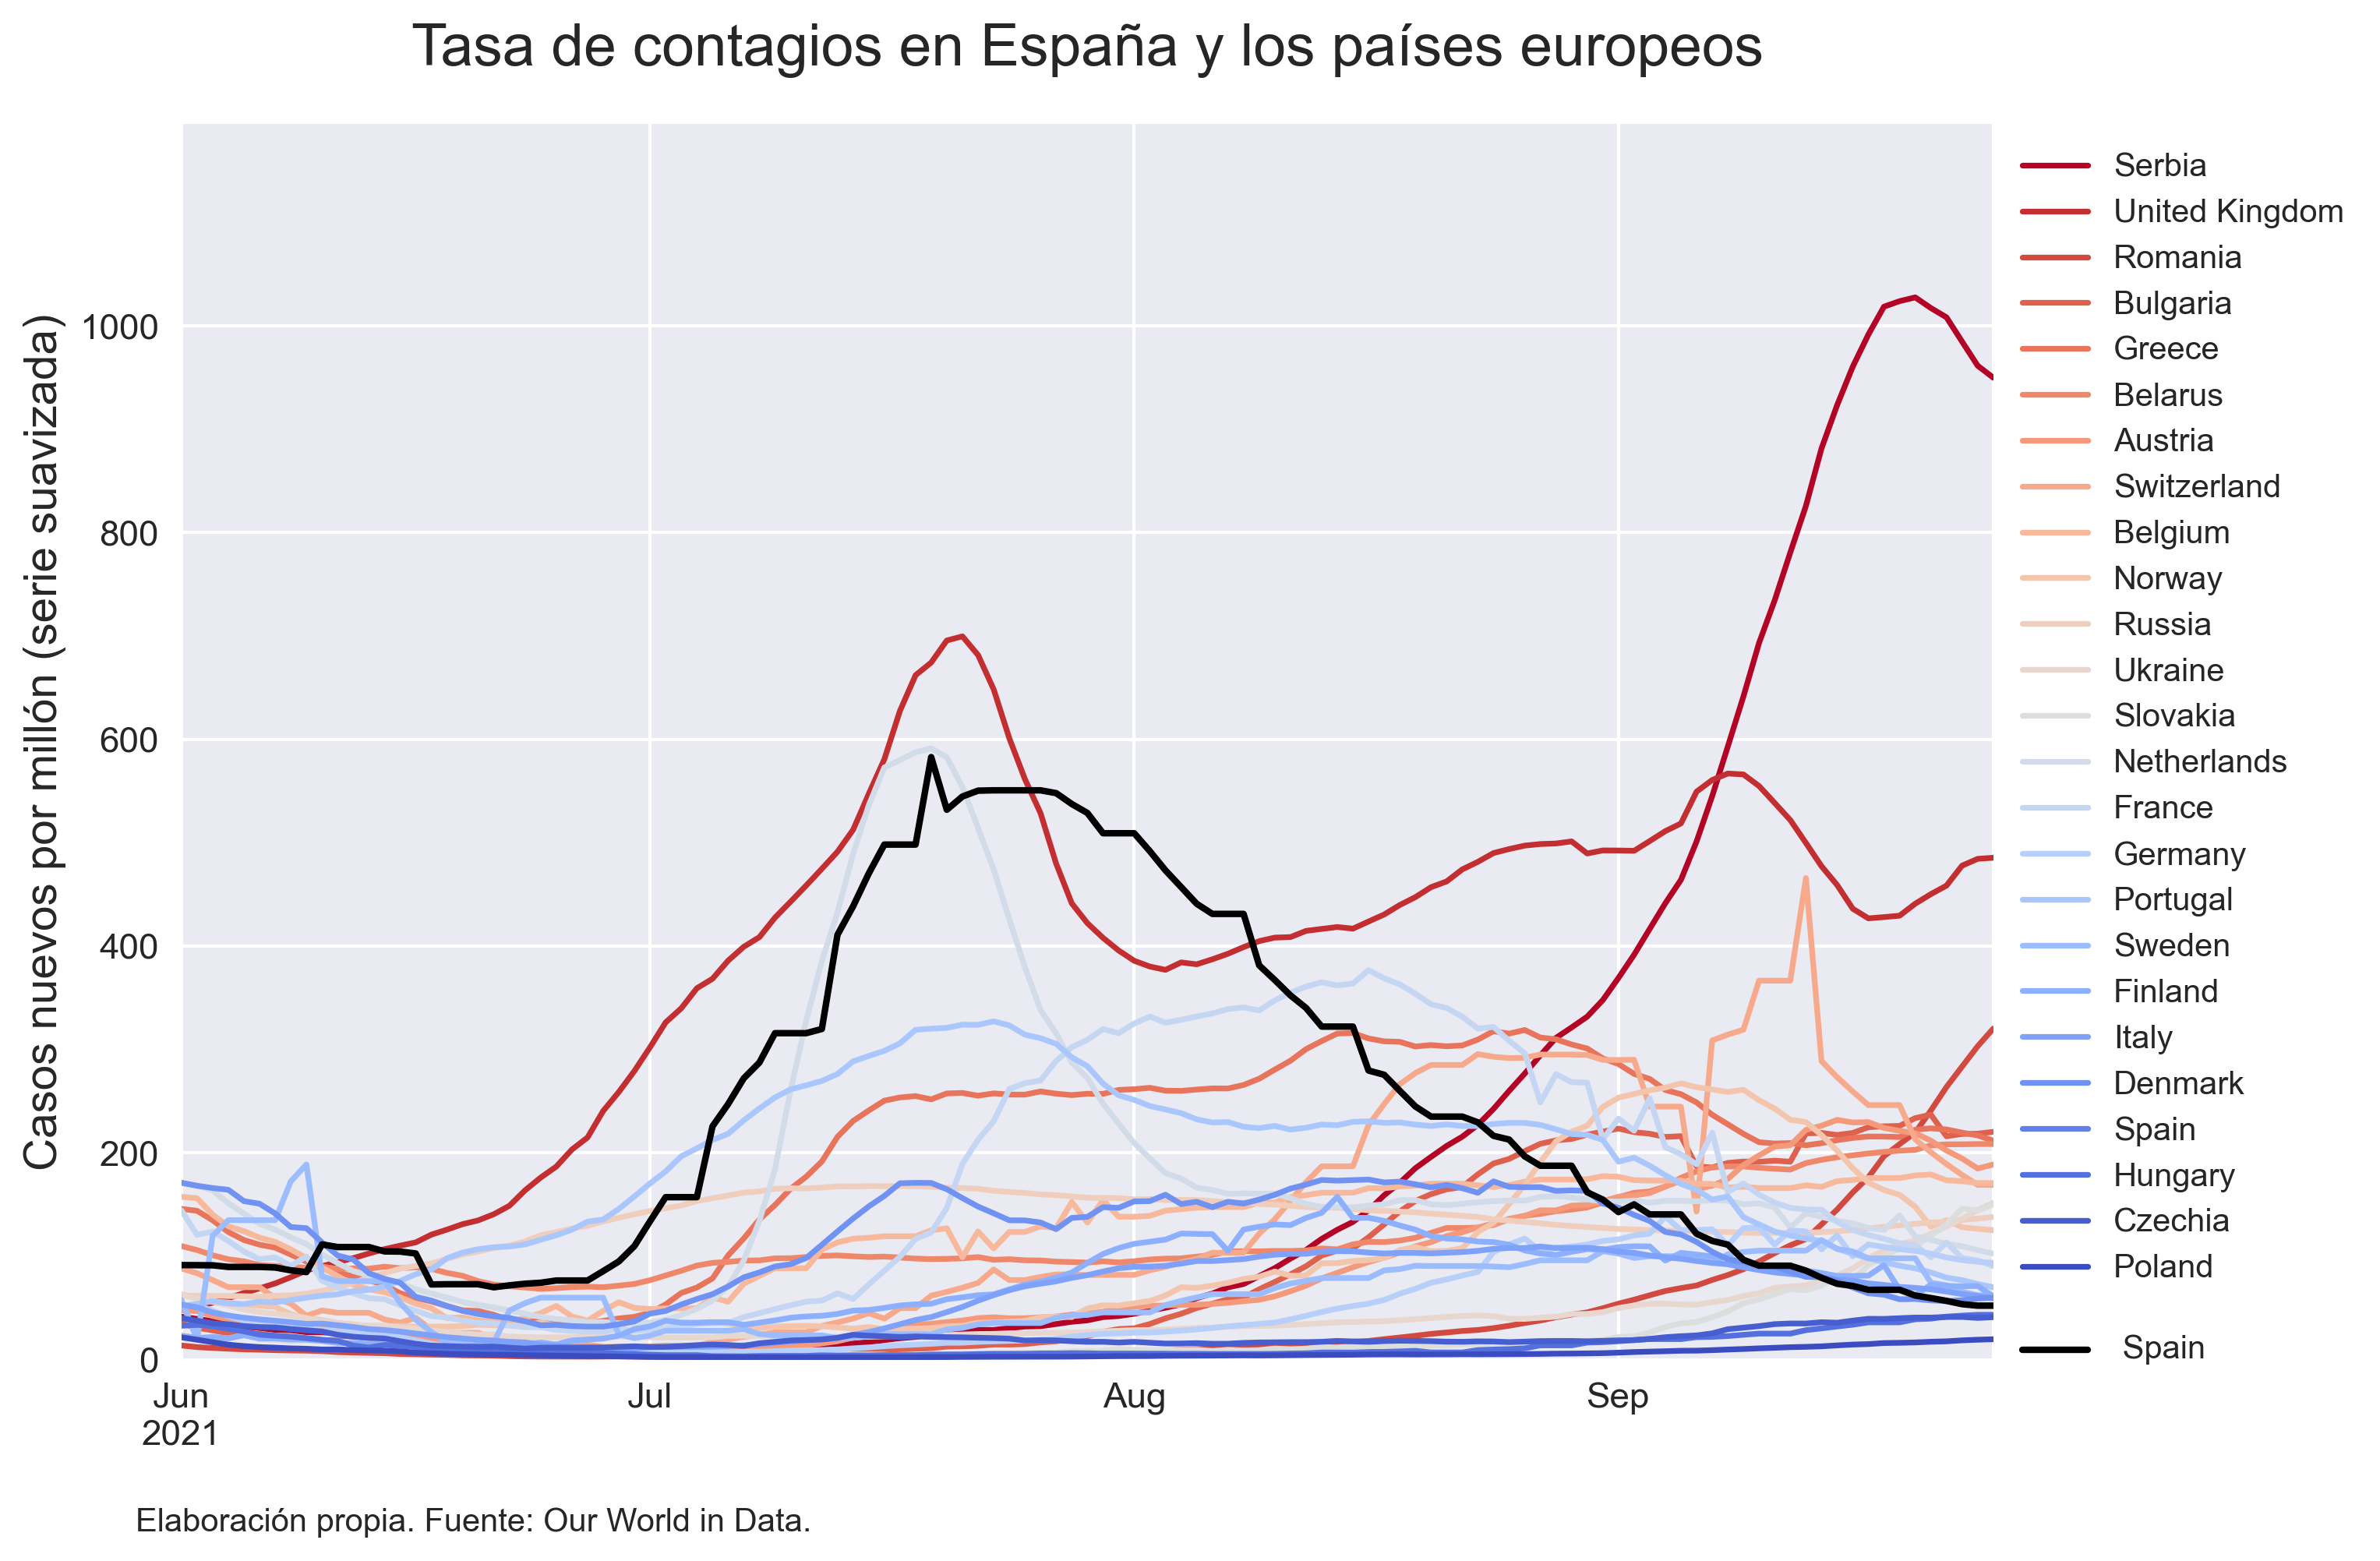

In [33]:
fig,ax=plt.subplots(figsize=(10,7), dpi=300)
df.plot(colormap="coolwarm_r", ax=ax)
df["Spain"].plot(c="black", linewidth=2, ax=ax, label="\n Spain \n ")
ax.set_xlabel("")
ax.set_ylabel("Casos nuevos por millón (serie suavizada)", size=14)
ax.set_title("Tasa de contagios en España y los países europeos", size=18, pad=18)
ax.set_ylim(0,df2[0].max()*1.2)
ax.legend(bbox_to_anchor=(1, 1))
ax.tick_params(labelsize=11)
fig.text(0.25,0.02,"Elaboración propia. Fuente: Our World in Data.", ha="center",fontsize=10 ) # ha=horizontalalignment
plt.show()

In [34]:
# Ahora un gráfico para el caso de las muertes
    #Preparamos los datos
df=datos.query("continent=='Europe' and population>5000000")
df.location.value_counts()
listcountries=df.location.unique()
df=df[['location','new_deaths_smoothed_per_million']] 
df=df.set_index([df.index,"location"]).unstack('location')
df

new_deaths_smoothed_per_million                                   \
location                           Austria Belarus Belgium Bulgaria Czechia   
date                                                                          
2021-06-01                           1.011   1.059   1.167    3.004   1.039   
2021-06-02                           0.869   1.059   1.142    2.693   0.959   
2021-06-03                           0.853   1.074   1.142    3.211   1.026   
2021-06-04                           0.679   1.074   1.277    3.273   0.719   
2021-06-05                           0.695   1.044   1.204    3.231   0.746   
...                                    ...     ...     ...      ...     ...   
2021-09-21                           1.090   1.316   0.577    9.943   0.346   
2021-09-22                           1.216   1.331   0.577    9.156   0.386   
2021-09-23                           1.153   1.331   0.602    9.818   0.346   
2021-09-24                           1.122   1.331   0.700    9.694   0.320   
2021-09-25                           1.137   1.362   0.700    9.611   0.306   

                                                                             \
location   Denmark Finland France Germany Greece Hungary  Italy Netherlands   
date                                                                          
2021-06-01   0.147   0.360  1.658   1.784  3.444   2.669  1.704       0.549   
2021-06-02   0.123   0.335  1.554   1.609  3.154   2.254  1.564       0.566   
2021-06-03   0.147   0.335  1.402   1.429  3.154   2.046  1.299       0.549   
2021-06-04   0.123   0.283  1.324   1.349  3.072   2.017  1.174       0.491   
2021-06-05   0.049   0.283  1.300   1.388  3.154   1.972  1.112       0.507   
...            ...     ...    ...     ...    ...     ...    ...         ...   
2021-09-21   0.467   0.180  0.945   0.601  3.857   0.578  0.932       0.458   
2021-09-22   0.418   0.283  1.080   0.681  3.637   0.430  0.918       0.433   
2021-09-23   0.467   0.257  1.165   0.688  3.471   0.400  0.909       0.474   
2021-09-24   0.442   0.335  1.119   0.753  3.375   0.415  0.876       0.424   
2021-09-25   0.369   0.360  1.047   0.739  3.058   0.415  0.873       0.441   

                                                                         \
location   Norway Poland Portugal Romania Russia Serbia Slovakia  Spain   
date                                                                      
2021-06-01  0.026  2.872    0.056   2.338  2.578  1.491    1.360  0.556   
2021-06-02  0.052  2.566    0.056   2.412  2.567  1.470    1.413  0.593   
2021-06-03  0.052  2.400    0.098   2.748  2.559  1.407    1.439  0.492   
2021-06-04  0.052  2.056    0.084   3.271  2.534  1.386    1.282  0.886   
2021-06-05  0.052  1.727    0.126   3.570  2.530  1.365    1.622  0.889   
...           ...    ...      ...     ...    ...    ...      ...    ...   
2021-09-21  0.314  0.265    0.745   4.399  5.328  5.144    0.471  1.329   
2021-09-22  0.235  0.261    0.717   4.750  5.352  5.291    0.602  1.366   
2021-09-23  0.235  0.276    0.702   5.064  5.379  5.500    0.680  1.363   
2021-09-24  0.235  0.295    0.731   5.601  5.417  5.626    0.654  1.363   
2021-09-25  0.235  0.317    0.702   5.781  5.443  5.773    0.706  1.363   

                                                      
location   Sweden Switzerland Ukraine United Kingdom  
date                                                  
2021-06-01  0.773       0.328   3.484          0.092  
2021-06-02  0.211       0.361   3.316          0.098  
2021-06-03  0.858       0.344   3.047          0.115  
2021-06-04  1.012       0.344   2.843          0.117  
2021-06-05  1.012       0.295   2.619          0.130  
...           ...         ...     ...            ...  
2021-09-21  0.858       0.770   2.353          2.134  
2021-09-22  0.970       0.770   2.396          2.065  
2021-09-23  0.844       0.705   2.462          2.141  
2021-09-24  0.647       0.705   2.590          2.141  
2021-09-25  0.647       0.721  

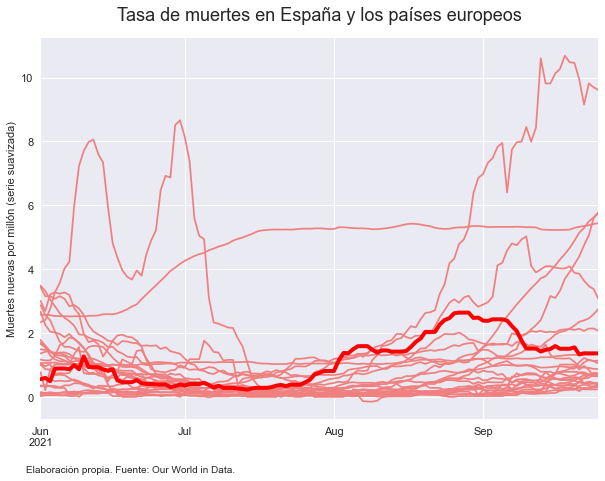

In [35]:
fig,ax=plt.subplots(figsize=(10,7))
df["new_deaths_smoothed_per_million"].plot(color="lightcoral",  legend=False, ax=ax)
df["new_deaths_smoothed_per_million"]["Spain"].plot(color="red", linewidth=4, ax=ax)
ax.set_xlabel("")
ax.tick_params(labelsize=11)
ax.set_ylabel("Muertes nuevas por millón (serie suavizada)")
ax.set_title("Tasa de muertes en España y los países europeos", size=18, pad=18)
fig.text(0.25,0.02,"Elaboración propia. Fuente: Our World in Data.", ha="center",fontsize=10 ) # ha=horizontalalignment
plt.show()

In [36]:
# Última celda del notebook
# 1. Guardar esta última versión que acaba de ejecutarse
from IPython.display import display, Javascript
display(Javascript('IPython.notebook.save_checkpoint();'))
# 2. Producir el informe en versión HTML
import os
os.chdir(r"C:\Users\danie\CyP")
#os.system("jupyter nbconvert Pandemia_COVID19_Europa.ipynb --to html --no-input --no-prompt ")
os.system("jupyter nbconvert Pandemia_COVID19_Europa.ipynb --to html --no-input --no-prompt ")

<IPython.core.display.Javascript object>

0